# Using the QR factorisation in least squares problems



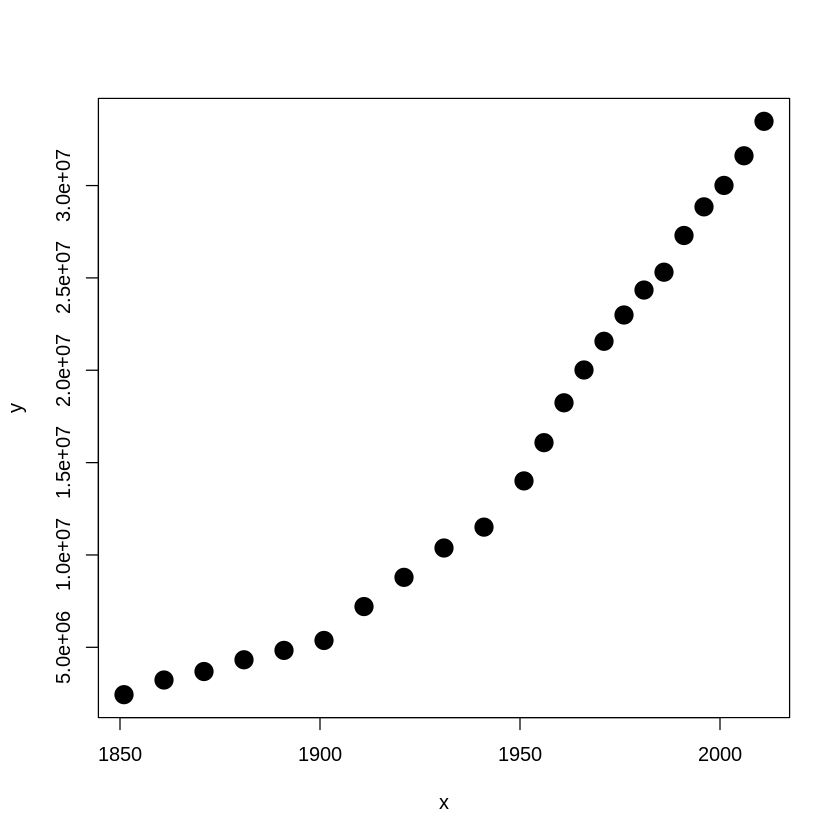

In [1]:
data = read.csv("Canada_census.csv")
x=data$year
y=data$population
plot(x,y, pch = 19, cex = 2)

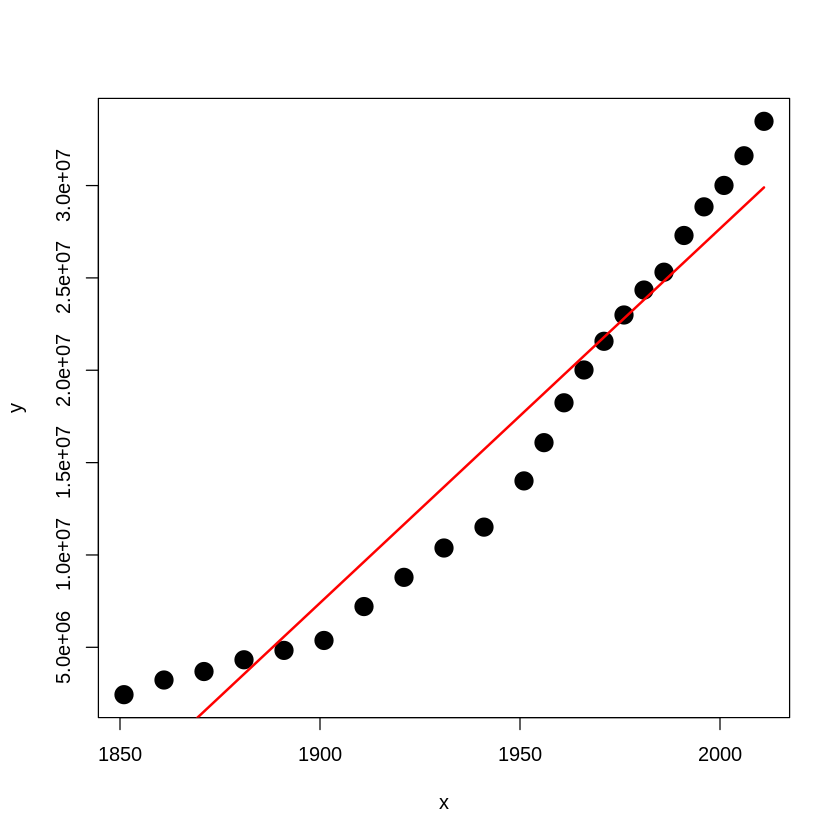

In [2]:
A1 = matrix(c(rep(1, length(x)), x), nr = length(x), nc = 2)
b = y
ATA1 = t(A1) %*% A1
invATA1 = solve(ATA1)
sol = invATA1 %*% t(A1) %*% b

plot(x,y, pch = 19, cex = 2)
lines(x, sol[1]+sol[2]*x, type = "l", lwd = 2, col = "red")

In [3]:
A2 = matrix(c(rep(1, length(x)), x, x^2), nr = length(x), nc = 3)
ATA2 = t(A2) %*% A2
det(ATA2)
invATA = solve(ATA2)

[1] 1.169443e+14

ERROR: Error in solve.default(ATA2): system is computationally singular: reciprocal condition number = 2.05592e-20


# Solving the bad condition number issue by shifting values

That's when we do the shift, so let us "revamp" the data a little to make it more friendly. We will not use it, but it is a good habit to have because in a more complex project, we would use this rather than x and x_new.

In [4]:
x_new = x-min(x)
# We also add this to the data
data$year_shifted = x_new

A_l = matrix(c(rep(1, length(x_new)), x_new), nr = length(x_new), nc = 2)
ATA_l = t(A_l) %*% A_l
det(ATA_l)
invATA_l = solve(ATA_l)
sol_l = invATA_l %*% t(A_l) %*% b

A_q = matrix(c(rep(1, length(x)), x_new, x_new^2), nr = length(x), nc = 3)
ATA_q = t(A_q) %*% A_q
det(ATA_q)
invATA_q = solve(ATA_q)
sol_q = invATA_q %*% t(A_q) %*% b

[1] 1233650

[1] 1.169443e+14

We plot everything in terms of x_new, but we do not label the x-axis (`xaxt="n"`), then use the function `axis` to do that "by hand". For that function, 1 means x-axis below, 2 is y-axis left, 3 is x-axis top and 4 is y-axis right, `at` is .. where the labels are, `labels` is .. you guessed it, the labels.

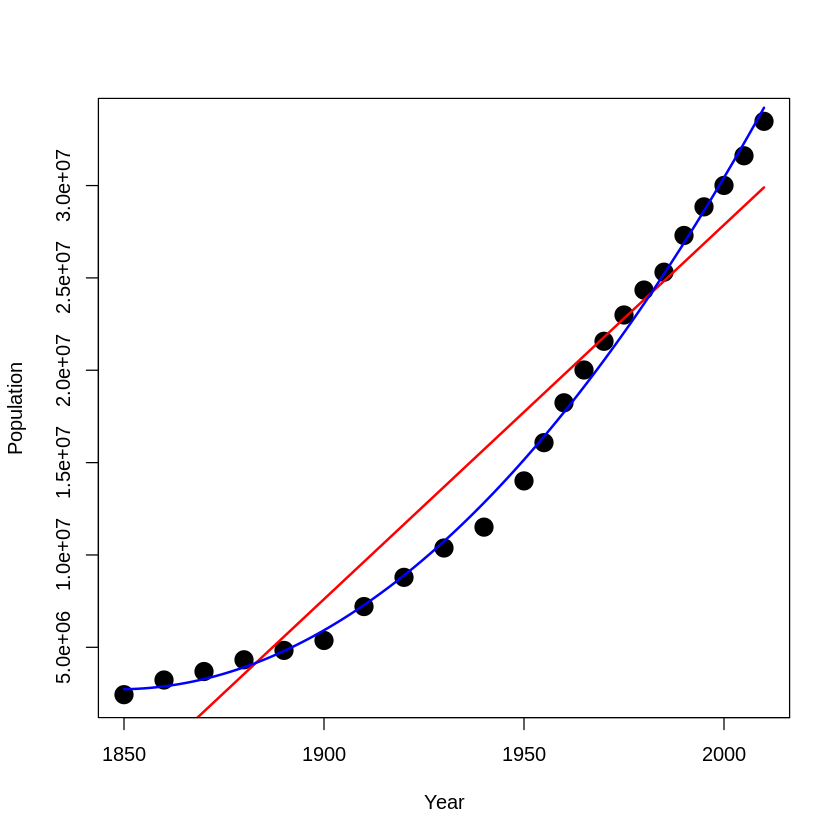

In [5]:
x_values = seq(x_new[1], x_new[length(x_new)], 0.01)

plot(x_new, y, pch = 19, cex = 2, xaxt = "n", 
    xlab = "Year", ylab = "Population")
lines(x_values, sol_l[1]+sol_l[2]*x_values, 
      type = "l", lwd = 2, col = "red")
lines(x_values, sol_q[1]+sol_q[2]*x_values+sol_q[3]*x_values^2, 
      type = "l", lwd = 2, col = "blue")
axis(1, at = pretty(x_new),labels = pretty(x))

# Now let us do it using the QR factorisation

We go back to the original matrix $A$ and use the function .. `qr`.

In [6]:
QR = qr(A2)
QR

$qr
            [,1]          [,2]          [,3]
 [1,] -4.7958315 -9.323305e+03 -1.813609e+07
 [2,]  0.2085144  2.315965e+02  8.955565e+05
 [3,]  0.2085144  2.460743e-01 -9.736290e+03
 [4,]  0.2085144  2.028958e-01 -7.890935e-02
 [5,]  0.2085144  1.597172e-01 -1.693014e-01
 [6,]  0.2085144  1.165387e-01 -2.391518e-01
 [7,]  0.2085144  7.336017e-02 -2.884604e-01
 [8,]  0.2085144  3.018163e-02 -3.172274e-01
 [9,]  0.2085144 -1.299691e-02 -3.254526e-01
[10,]  0.2085144 -5.617544e-02 -3.131362e-01
[11,]  0.2085144 -9.935398e-02 -2.802780e-01
[12,]  0.2085144 -1.209433e-01 -2.561458e-01
[13,]  0.2085144 -1.425325e-01 -2.268782e-01
[14,]  0.2085144 -1.641218e-01 -1.924751e-01
[15,]  0.2085144 -1.857111e-01 -1.529366e-01
[16,]  0.2085144 -2.073003e-01 -1.082626e-01
[17,]  0.2085144 -2.288896e-01 -5.845329e-02
[18,]  0.2085144 -2.504789e-01 -3.508513e-03
[19,]  0.2085144 -2.720681e-01  5.657169e-02
[20,]  0.2085144 -2.936574e-01  1.217873e-01
[21,]  0.2085144 -3.152467e-01  1.921384e-01
[22,] 

In [7]:
# The following command is equivalent to doing sol_qr = QR %*% b, but it does so using the special format
# returned by the function qr
sol_qr = solve(QR,b)

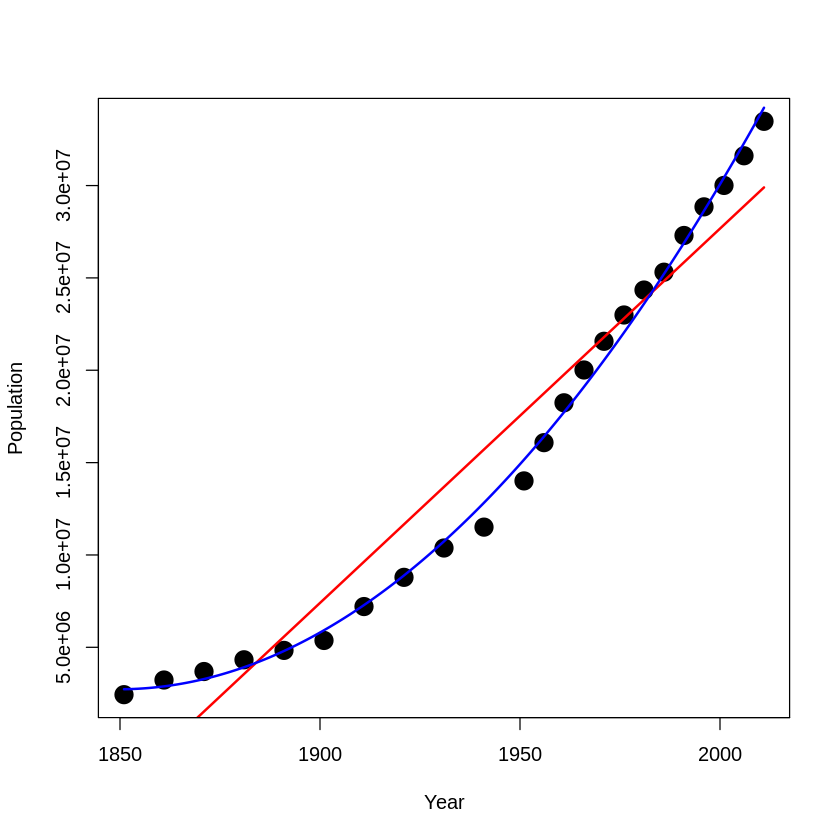

In [8]:
x_values = seq(x[1], x[length(x)], 0.01)

plot(x, y, pch = 19, cex = 2, xaxt = "n", 
    xlab = "Year", ylab = "Population")
# sol was our original solution at the beginning of the worksheet, before we shifted the values of x
lines(x_values, sol[1]+sol[2]*x_values, 
      type = "l", lwd = 2, col = "red")
lines(x_values, sol_qr[1]+sol_qr[2]*x_values+sol_qr[3]*x_values^2, 
      type = "l", lwd = 2, col = "blue")
axis(1, at = pretty(x),labels = pretty(x))

Note that the return value `qr$qr` is usable directly to solve the least squares problem, as shown above. However, if you want to find the values of Q and R, you will have to do a bit of work. From the documentation of the function `qr`:

In the return values of `qr`, `qr` contains a matrix with the same dimensions as x. The upper triangle contains the **R** of the decomposition and the lower triangle contains information on the **Q** of the decomposition (stored in compact form).

To find the values, you need to use the functions `qr.Q` and `qr.R` on the **result** matrix. That is,

In [10]:
Q = qr.Q(QR)
R = qr.R(QR)
# Note that you could also directly get the results from A by doing
# Q = qr.Q(qr(A2))
# R = qr.R(qr(A2))
Q
R

-0.2085144,-0.40174814,-0.44699274
-0.2085144,-0.35856960,-0.28791586
-0.2085144,-0.31539106,-0.14938070
-0.2085144,-0.27221252,-0.03138723
-0.2085144,-0.22903399,0.06606453
-0.2085144,-0.18585545,0.14297458
-0.2085144,-0.14267691,0.19934292
-0.2085144,-0.09949837,0.23516956
-0.2085144,-0.05631983,0.25045450
-0.2085144,-0.01314129,0.24519772
-0.2085144,0.03003724,0.21939925


-4.795832,-9323.3050,-18136094.35
0.000000,231.5965,895556.45
0.000000,0.0000,-9736.29


To finish, let us quickly check that the matrix $Q$ we obtain is indeed an orthonormal basis. Let us start by summing the squares of the entries in each column of $Q$. (Again, `R` is a little strange for the notation of matrix operations: $Q^2$ is the entry-wise square, not the matrix $QQ$ -- which here would not be computable, just in passing.)

In [11]:
colSums(Q^2)

[1] 1 1 1

Let us check pairwise orthogonality now. (This could be useful for an assignment.)

In [12]:
ncol = dim(Q)[2]
all_pairs_of_columns = combn(1:ncol, 2)
all_pairs_of_columns

1,1,2
2,3,3


So the result is a matrix in which each column contains the indices of a pair of columns to check for orthogonality..

In [13]:
dot_product_pair = c()
for (i in 1:dim(all_pairs_of_columns)[2]) {
    dot_product_pair = c(dot_product_pair, 
                         Q[,all_pairs_of_columns[1,i]] %*% Q[,all_pairs_of_columns[2,i]])
}
dot_product_pair

[1] -2.230688e-17 -1.741377e-16  1.337715e-17

OK, numerical imprecisions are showing up, which could be expected. However, unless you are dealing with extremely small numbers throughout $Q$, you can definitely put anything below $10^{-14}$ to zero..